## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read CSV

In [2]:
def read_csv():
    return pd.read_csv('influencers.csv', index_col = 'id')

In [3]:
data = read_csv()

In [4]:
data.head()

,followerCount,engagementRate
id,,
1,6207,1.0
2,38237,5.8
3,14840,0.6
4,43851,1.4
5,15530,3.5


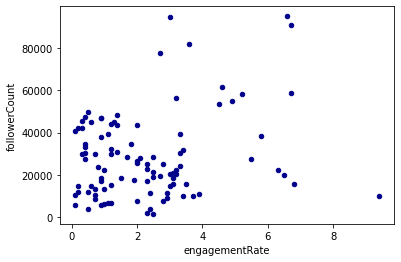

In [5]:
data.plot.scatter(y='followerCount', x='engagementRate', c='DarkBlue')

## Fuzzification

In [6]:
def fuzzification(data_fol, data_eng):
    val = dict()
    foll_score = data_fol
    val['low_fl'] = low_fol_calc(foll_score)
    val['mid_fl'] = mid_fol_calc(foll_score)
    val['hi_fl'] = hi_fol_calc(foll_score)
    eng_score = data_eng
    val['low_en'] = low_eng_calc(eng_score)
    val['mid_en'] = mid_eng_calc(eng_score)
    val['hi_en'] = hi_eng_calc(eng_score)
    return val

## Inference

In [7]:
#Inference Rules
#low follower low engagement = refused
#mid follower low engagement = refused
#high follower low engagement = considered

#low follower mid engagement = refused
#mid follower mid engagement = considered
#high follower mid engagement = accept

#low follower high engagement = considered
#mid follower high engagement = accept
#high follower high engagement = accept

In [8]:
def inference(data):
    list_ref=[]
    list_con=[]
    list_acc=[]
    # low follower low engagement
    if data['low_fl'] < data['low_en']:
        list_ref.append(data['low_fl'])
    else:
        list_ref.append(data['low_en'])
    # mid follower low engagement
    if data['mid_fl'] < data['low_en']:
        list_ref.append(data['mid_fl'])
    else:
        list_ref.append(data['low_en'])
    # hi follower low engagement
    if data['hi_fl'] < data['low_en']:
        list_con.append(data['hi_fl'])
    else:
        list_con.append(data['low_en'])
    # low follower mid engagement
    if data['low_fl'] < data['mid_en']:
        list_ref.append(data['low_fl'])
    else:
        list_ref.append(data['mid_en'])
    # mid follower mid engagement
    if data['mid_fl'] < data['mid_en']:
        list_con.append(data['mid_fl'])
    else:
        list_con.append(data['mid_en'])
    # hi follower mid engagement
    if data['hi_fl'] < data['mid_en']:
        list_acc.append(data['hi_fl'])
    else:
        list_acc.append(data['mid_en'])
    # low follower hi engagement
    if data['low_fl'] < data['hi_en']:
        list_con.append(data['low_fl'])
    else:
        list_con.append(data['hi_en'])
    # mid follower hi engagement
    if data['mid_fl'] < data['hi_en']:
        list_acc.append(data['mid_fl'])
    else:
        list_acc.append(data['hi_en'])
    # hi follower hi engagement
    if data['hi_fl'] < data['hi_en']:
        list_acc.append(data['hi_fl'])
    else:
        list_acc.append(data['hi_en'])
    return max(list_ref),max(list_con),max(list_acc)

## Defuzzification

In [9]:
def defuzzification(ref,con,acc):
    score = (acc*100 + con*60 + ref*20)/(ref+acc+con)
    return score

## Membership Function Follower

In [10]:
def low_fol_calc(data):
    if data <= 10000:
        score = 1
    elif 10000 < data <= 20000:
        score = (20000-data)/(20000-10000)
    else:
        score = 0
    return score
    
def mid_fol_calc(data):
    if  15000 < data <= 30000:
        score = (data-15000)/(30000-15000)
    elif 30000 < data <= 50000:
        score = 1
    elif 50000 < data <= 65000:
        score = (65000-data)/(65000-50000)
    else:
        score = 0
    return score

def hi_fol_calc(data):
    if data <= 50000:
        score = 0
    elif 50000 < data <= 70000:
        score = (data-50000)/(70000-50000)
    else:
        score = 1
    return score

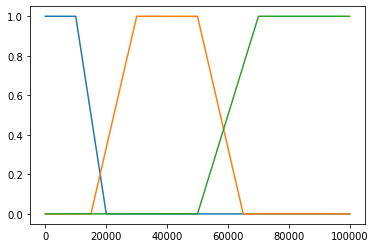

In [11]:
plt.plot([low_fol_calc(i) for i in range(100001)])
plt.plot([mid_fol_calc(i) for i in range(100001)])
plt.plot([hi_fol_calc(i) for i in range(100001)])


## Membership Function Engagement

In [12]:
def low_eng_calc(data):
    if data <= 1:
        score = 1
    elif 1 < data < 2.5:
        score = (2.5-data)/(2.5-1)
    else:
        score = 0
    return score
        
def mid_eng_calc(data):
    if data > 2  and data <= 3.5:
        score = (data-2)/(3.5-2)
    elif 3.5 < data <= 6.5:
        score = 1
    elif 6.5 < data < 8:
        score = (8-data)/(8-6.5)
    else:
        score = 0
    return score

def hi_eng_calc(data):
    if data <= 7.5 :
        score = 0
    elif 7.5 < data < 8.5:
        score = (data-7.5)/(8.5-7.5)
    else:
        score = 1
    return score

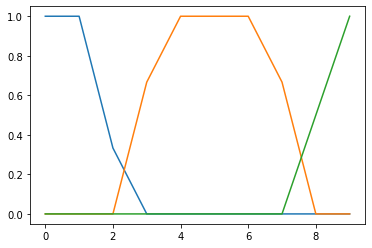

In [13]:
plt.plot([low_eng_calc(i) for i in range(10)])
plt.plot([mid_eng_calc(i) for i in range(10)])
plt.plot([hi_eng_calc(i) for i in range(10)])

## Main

In [14]:
list_score=[]
for i in range(1,101):
    fuzzified = fuzzification(data['followerCount'][i],data['engagementRate'][i])
    ref,con,acc = inference(fuzzified)
    list_score.append(defuzzification(ref,con,acc))
    

In [15]:
data['score'] = list_score

In [16]:
out = data.sort_values(by=['score','followerCount'],ascending=False)
chosen = out.head(20)

## Pick Best 20

In [17]:
out.reset_index(inplace=True)

In [18]:
out['sign'] = 0

In [19]:
out.ix[:20,'sign'] = 1

C:\Users\rizkyy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


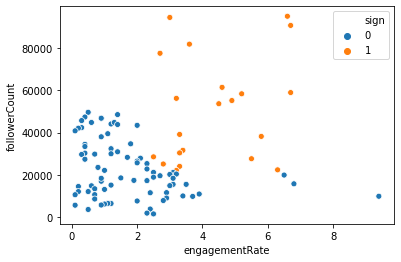

In [20]:
sns.scatterplot(y='followerCount',x='engagementRate',hue='sign',data=out)

In [21]:
chosen

,followerCount,engagementRate,score
id,,,
11,95117,6.6,100.000000
13,90773,6.7,100.000000
41,81909,3.6,100.000000
25,77585,2.7,100.000000
75,94551,3.0,100.000000
72,61456,4.6,88.319051
59,58987,6.7,81.140494
60,58403,5.2,79.542997
53,56257,3.2,73.970936


## Export to CSV

In [22]:
chosen.reset_index()[['id']].to_csv('chosen.csv',index=False)